<a href="https://colab.research.google.com/github/iarora697/Codsoft-Task/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dependencies

---




In [4]:
import numpy as np
import pandas as pd # Import the pandas library and alias it as 'pd'
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [5]:
import io
titanic_data = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv']))
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# number of rows and columns
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_data.shape

(891, 12)

In [8]:
#getting some information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

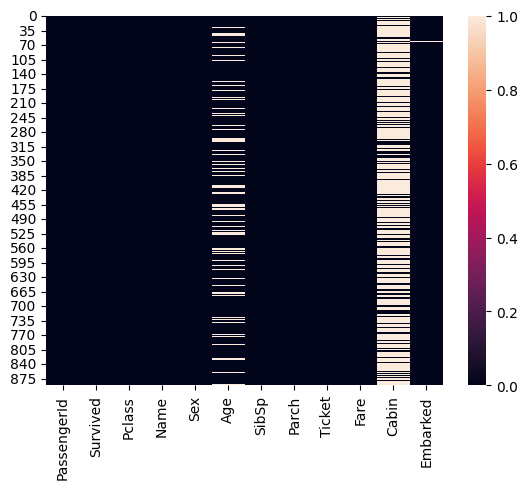

In [10]:
sns.heatmap(titanic_data.isnull())

In [11]:
ports = pd.get_dummies(titanic_data['Embarked'],dtype=int)
ports.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [12]:
titanic_data = titanic_data.join(ports)


In [13]:
titanic_data.drop('Embarked',axis=1,inplace=True)

In [14]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [15]:
titanic_data.Sex=titanic_data.Sex.map({'male':0,'female':1})

In [16]:
Y = titanic_data.Survived.copy()
X = titanic_data.drop('Survived',axis=1)

In [17]:
X.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

In [18]:
# check the number of missing values in each column
X.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
C           0
Q           0
S           0
dtype: int64

Handling the Missing Values

In [19]:
X.Age.fillna(X.Age.mean(), inplace=True)

In [20]:
X.isnull().values.any()

False

# Data Visualization

---



In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

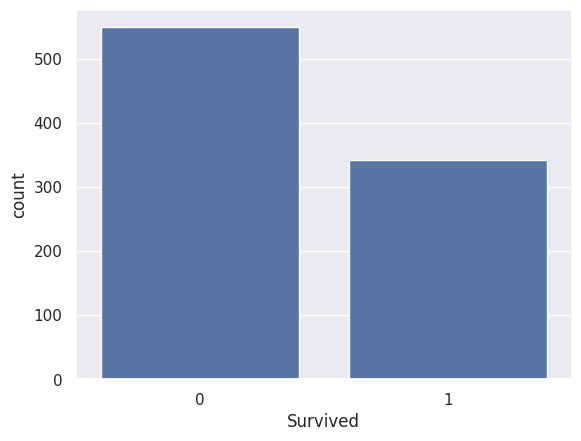

In [ ]:
#making a count plot for "Survived" column
sns.countplot(x='Survived', data=titanic_data)

In [ ]:
#finding the number of people survived and not survived
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

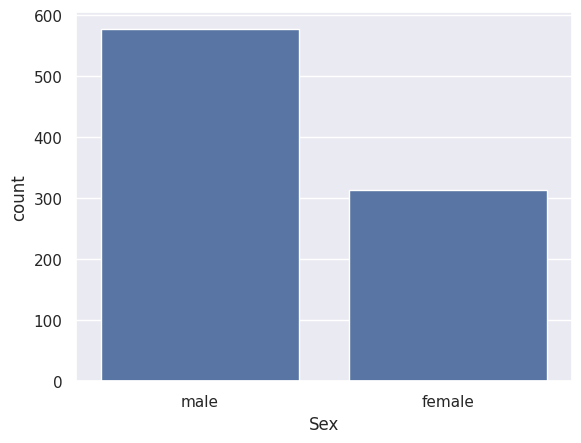

In [ ]:
#making a count plot for "Sex" column
sns.countplot(x='Sex',data=titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

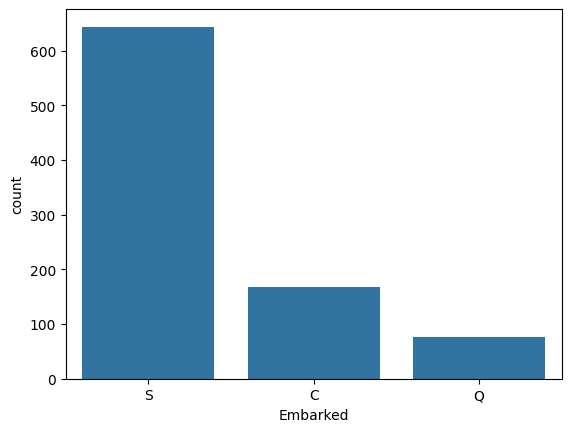

In [ ]:
sns.countplot(x='Embarked',data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

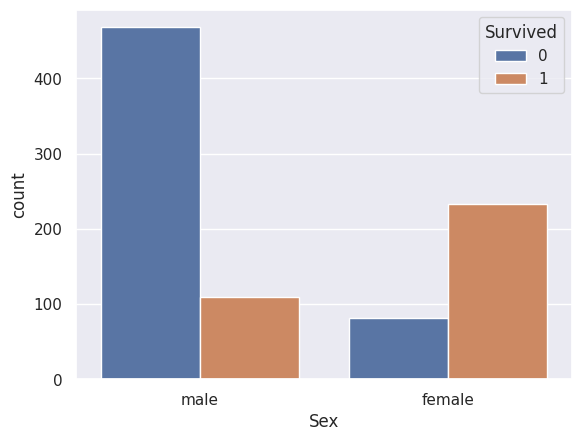

In [ ]:
#number of survivors Gender wise
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

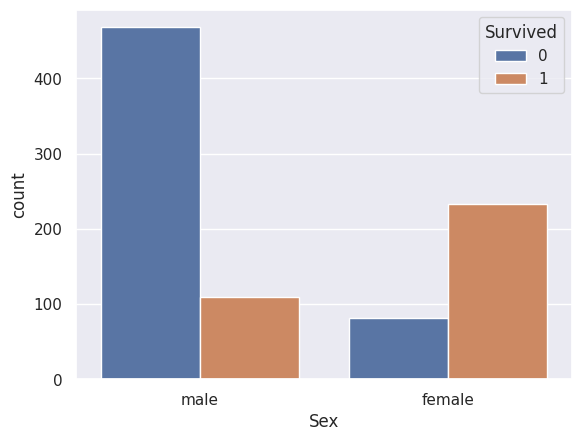

In [ ]:
#number of survivors Gender wise
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

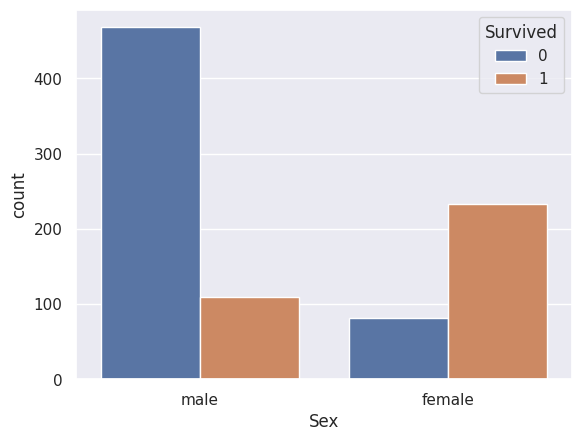

In [ ]:
#number of survivors Gender wise
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

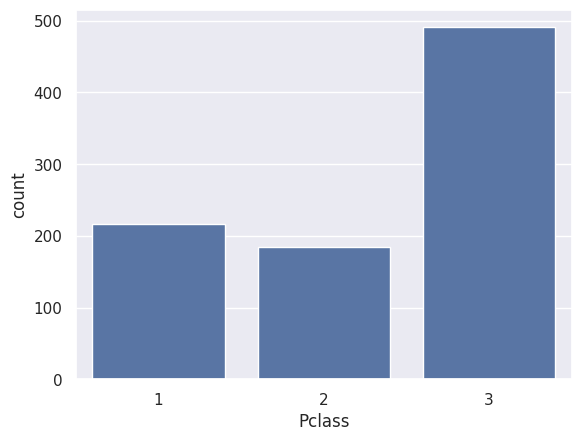

In [ ]:
#making a count plot for "Pclass" column
sns.countplot(x='Pclass',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

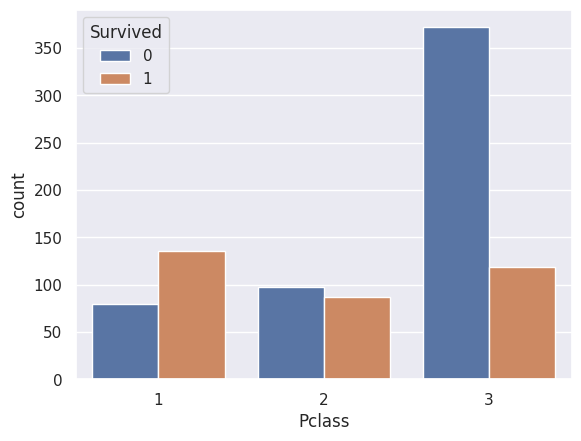

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

# Encoding the Categorical Columns

---



In [ ]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
titanic_data['Embarked'].value_counts()

Embarked
0    644
1    168
2     77
3      2
Name: count, dtype: int64

Separting Features & Targets

In [ ]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [31]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  C  Q  S
0         3    0  22.000000      1      0   7.2500  0  0  1
1         1    1  38.000000      1      0  71.2833  1  0  0
2         3    1  26.000000      0      0   7.9250  0  0  1
3         1    1  35.000000      1      0  53.1000  0  0  1
4         3    0  35.000000      0      0   8.0500  0  0  1
..      ...  ...        ...    ...    ...      ... .. .. ..
886       2    0  27.000000      0      0  13.0000  0  0  1
887       1    1  19.000000      0      0  30.0000  0  0  1
888       3    1  29.699118      1      2  23.4500  0  0  1
889       1    0  26.000000      0      0  30.0000  1  0  0
890       3    0  32.000000      0      0   7.7500  0  1  0

[891 rows x 9 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Splitting The Data Into Train

---





In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(891, 9) (712, 9) (179, 9)


## Model Training & Testing

---



In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
model.score(X_train, Y_train)

0.8061797752808989

In [35]:
Y_pred_test = model.predict(X_test)
Y_pred_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred_test)))

Model accuracy score: 0.7821
